## Import the necessary libraries

In [2]:
import pandas as pd #pandas for data analysis
import matplotlib.pyplot as plt #
%matplotlib inline

## load csv from disk or from internet using the csv link

In [3]:
#df = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')
# or load it from the dick
df = pd.read_csv('climate.csv')

## Show the first five values in the data frame

In [4]:
df.head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


## Show the various datatypes in the dataframe

In [5]:
df.dtypes

Unnamed: 0                        int64
record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

## Check null values in our dataset

In [6]:
df.isna().sum()

Unnamed: 0                        0
record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

- from the above output, we have 180 null values in fuel unit
- We can do well to check the overall shape of the dataframe to help us decide what to do

In [7]:
df.shape

(29523, 12)

### let calculate the percent of null values to the total values

In [8]:
180 / 29523 * 100

0.609694136774718

- from the shape of the dataframe, we have 29523 rows of which 180 is not significant to care about. Hence we are going to drop any row with null values.

In [9]:
df = df.dropna(how='any')

In [10]:
df.isna().sum()

Unnamed: 0                      0
record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

- Now we have all null values eliminated.


## Let see a summary of our data where possible

In [11]:
df.describe()

,Unnamed: 0,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29343.000000,29343.000000,29343.000000,2.934300e+04,29343.000000,29343.000000,2.934300e+04,29343.000000
mean,14776.258563,118.507037,2005.819105,2.609171e+06,8.477481,209.756592,9.230343e+02,18.543975
std,8516.582808,74.241226,7.019855,8.798699e+06,10.537478,2863.194789,6.898652e+04,2097.367750
min,0.000000,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,7402.500000,55.000000,2000.000000,1.375050e+04,1.024000,5.230000,3.793000e+00,1.950000
50%,14785.000000,122.000000,2006.000000,2.524640e+05,5.763072,26.039000,1.749000e+01,4.140000
75%,22149.500000,176.000000,2012.000000,1.424218e+06,17.000000,47.172000,4.220850e+01,7.752000
max,29522.000000,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


## From our Cleaned data, we can now start exploring
 #### For example: 
 - What year has the highest fuel quality burned
 - Which type of gas was used the most
 - Which plant consumes more gas

<AxesSubplot:xlabel='report_year'>

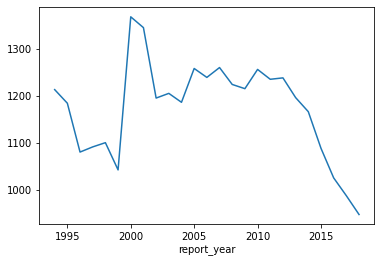

In [12]:
df.groupby('report_year').count()['fuel_qty_burned'].plot()

- From the Graph, we observe that the quantity of fuel burnt was at it peak in 1999 - 2002
- While an unstable quantity burn was record from 2003 - 2012. But the interesting thing here is that from 2013 to 2018 a significant drop in the quantity of fuel burnt was experience.
- That's a huge success in managing carbon emission from burnt gas and more.

<AxesSubplot:xlabel='fuel_type_code_pudl'>

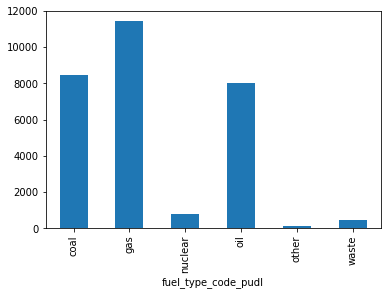

In [13]:
df.groupby('fuel_type_code_pudl').count()['fuel_qty_burned'].plot(kind='bar')

- From our bar plot, gas is used the most, followed by coal, then oil, nuclear, waste and other
######  Our graph is actually bias for the following reasons 
- We assumed that all the fuel units are the same which is not true. 
- Secondly we only count occurances of the categorical data and assume the one most mention is the one most used. that is not true as well
##### But those errors can be handle  by the following means 
- convert the various units into one single suitable unit
- Instead of counting, we take a summation of the unit value for all the fuels  before ploting the graph. 

### Which year has the highest average fuel cost per unit delivered

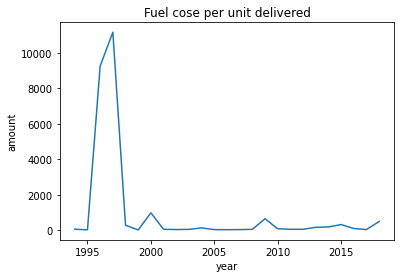

In [14]:
df.groupby('report_year').mean()['fuel_cost_per_unit_delivered'].plot(title='Fuel cose per unit delivered', xlabel='year', ylabel='amount')
plt.show()

In [31]:
df.groupby('report_year').mean()['fuel_cost_per_unit_delivered'].max()

11170.820632447296

- The year with Maximum average fuel cost per unit delivered is 1997

In [15]:
df.groupby('fuel_type_code_pudl').mean()['fuel_cost_per_unit_burned']

fuel_type_code_pudl
coal         67.603187
gas          13.707197
nuclear    5047.223037
oil         169.045434
other        20.444221
waste        19.647350
Name: fuel_cost_per_unit_burned, dtype: float64

In [16]:
df.head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


#### For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994
- percentage change == difference coming after subtracting the old value from the new value and then divide by the old value and the final answer will be multiplied by 100

In [17]:
coal_1998 = df[(df['fuel_type_code_pudl'] == 'coal') |(df['report_year'] == 1998)].sum()['fuel_cost_per_unit_burned']

In [18]:
coal_1994 = df[(df['fuel_type_code_pudl'] == 'coal') |(df['report_year'] == 1994)].sum()['fuel_cost_per_unit_burned']

In [32]:
difference =   coal_1998 - coal_1994
diff = difference / coal_1994
diff * 100

-14.568236687698914

- The percentage change in the fuel cost per unit burned of coal in 1998 compared to 1994 is
- 14.568236687698914
- This show a decree in the fuel cost per unit burned